In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pypi_downloads import file_loader
import matplotlib.patches as patches

import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
from os import listdir


## check files in a directory


In [4]:
directory = '../data/external/monthly_data/'

df_list = []
for file in listdir(directory) :
    file = file_loader.FileLoader(directory + file)
    monhtly_dataset = file.load()
    df_list.append(monhtly_dataset)

df = pd.concat(df_list, axis=0)
df = df.reset_index().set_index('date')


In [5]:
df.groupby('date').installs.sum()

date
2024-05-27    39701689927
2024-06-27    43278259481
Name: installs, dtype: int64

In [6]:
df.index.value_counts().sort_index()

date
2024-05-27    543357
2024-06-27    562794
Name: count, dtype: int64

In [7]:
df.head()

,project,installs
date,,
2024-05-27,0,4274
2024-05-27,0-0-1,539
2024-05-27,0-618,320
2024-05-27,0-core-client,1464
2024-05-27,0-mod-butt,1


In [8]:
pivot_df = df.set_index(df.index.astype(str)).pivot_table(index='project', columns='date', values='installs', aggfunc='sum').fillna(0)

sns

Text(0, 0.5, 'June 24 Installs')

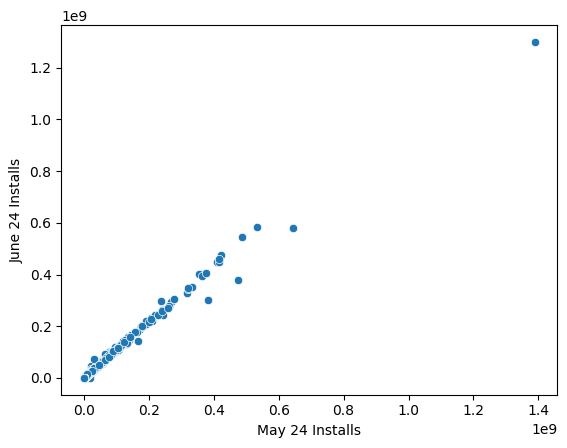

In [9]:
sns.scatterplot(x='2024-05-27', y='2024-06-27', data=pivot_df )
plt.xlabel('May 24 Installs')
plt.ylabel('June 24 Installs')


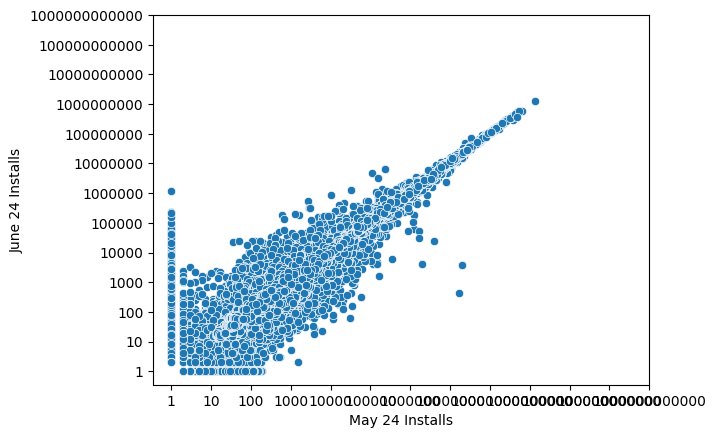

In [18]:
#scatter plot
pivot_df_log = np.log10(pivot_df + 1)#.round()
sns.scatterplot(x='2024-05-27', y='2024-06-27', data=pivot_df_log);
plt.xlabel('May 24 Installs')
plt.ylabel('June 24 Installs')
x_ticks = np.arange(0, len(ax.get_xticks()) + 3 , 1)
y_ticks = np.arange(0, len(ax.get_yticks()) + 3 , 1)
## change x axis ticks 
plt.xticks(x_ticks, [f'{10**i}' for i in x_ticks]);
plt.yticks(y_ticks, [f'{10**i}' for i in y_ticks]);


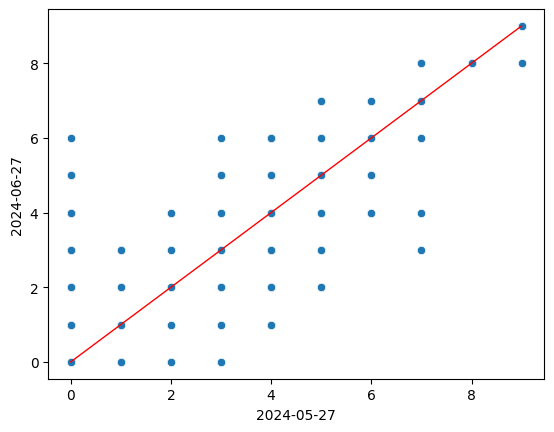

In [11]:
#scatter plot
pivot_df_log_round = pivot_df_log.round()
sns.scatterplot(x='2024-05-27', y='2024-06-27', data=pivot_df_log_round);
plt.plot([0, pivot_df_log_round.max().max()], [0, pivot_df_log_round.max().max()], color='red', linewidth=1);

In [12]:
pivot_df_log_round['diff'] = abs(pivot_df_log_round['2024-06-27'] - pivot_df_log_round['2024-05-27'])

summary_comp = pivot_df_log_round.groupby(['2024-05-27','2024-06-27','diff']).size().reset_index(name='count').sort_values('count', ascending=False)


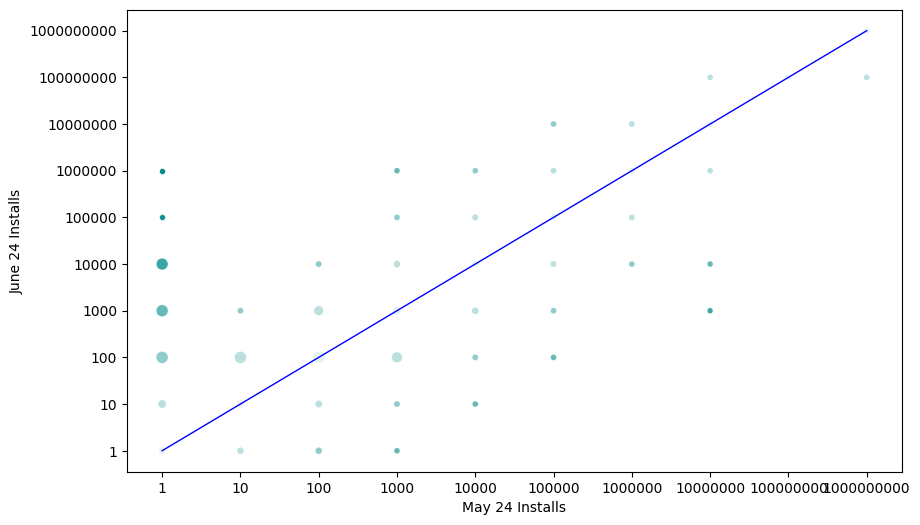

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

for diff in summary_comp['diff'].unique():
    plot_df = summary_comp[summary_comp["diff"] == diff]
    opacity = min(1,.1+ diff/6)
    sns.scatterplot(x='2024-05-27', y='2024-06-27', data=plot_df,size='count', alpha=opacity,legend=False,color = 'darkcyan');

x_ticks = np.arange(0, len(ax.get_xticks()) + 3 , 1)
y_ticks = np.arange(0, len(ax.get_yticks()) + 3 , 1)
## change x axis ticks 
plt.xticks(x_ticks, [f'{10**i:.0f}' for i in x_ticks]);
plt.yticks(y_ticks, [f'{10**i:.0f}' for i in y_ticks]);


## change x axis title
plt.xlabel('May 24 Installs')
plt.ylabel('June 24 Installs')

plt.plot([0, pivot_df_log_round.max().max()], [0, pivot_df_log_round.max().max()], color='blue', linewidth=1);

In [14]:
pivot_df

date,2024-05-27,2024-06-27
project,,
0,4274.0,5821.0
0-0-1,539.0,434.0
0-618,320.0,266.0
0-core-client,1464.0,1929.0
0-mod-butt,1.0,13.0
...,...,...
zzzymobbe,36.0,36.0
zzzz,63.0,56.0
zzzzz,3.0,1.0


In [15]:
new = pivot_df[pivot_df['2024-05-27'] == 0]
new.sort_values('2024-06-27', ascending=False).head(10)

date,2024-05-27,2024-06-27
project,,
ultralytics-thop,0.0,1218917.0
pinecone-plugin-interface,0.0,232052.0
zeroize,0.0,213276.0
sagemaker-mlflow,0.0,151280.0
rencrypt,0.0,99817.0
llama-cloud,0.0,74372.0
jaydebeapi3,0.0,68114.0
redefine,0.0,62232.0
opentelemetry-instrumentation-threading,0.0,60327.0


In [16]:
trending = pivot_df_log_round[pivot_df_log_round['2024-05-27'] > 2][pivot_df_log_round['2024-05-27'] <pivot_df_log_round['2024-06-27']]
trending = pivot_df.loc[trending.sort_values('diff', ascending=False).head(50).index]
trending['pct_change'] = trending.pct_change(axis = 1).round().iloc[:,-1]
trending.sort_values('pct_change', ascending=False).head(10)

date,2024-05-27,2024-06-27,pct_change
project,,,
lambda-thread-pool,591.0,182008.0,307.0
albucore,2675.0,547355.0,204.0
nada-dsl,691.0,134036.0,193.0
py-nillion-client,1272.0,192003.0,150.0
haproxy-stats,1641.0,187228.0,113.0
drisk-api,320.0,34600.0,107.0
flexcache,2914.0,307023.0,104.0
flexparser,3006.0,311446.0,103.0
gym-examples,513.0,49531.0,96.0


In [17]:
pivot_df.sort_values('2024-06-27', ascending=False).head(20)

date,2024-05-27,2024-06-27
project,,
boto3,1.388602e+09,1.299956e+09
urllib3,5.339211e+08,5.855052e+08
botocore,6.450350e+08,5.795178e+08
requests,4.858171e+08,5.438236e+08
certifi,4.229731e+08,4.761642e+08
typing-extensions,4.170807e+08,4.593702e+08
idna,4.172201e+08,4.494002e+08
charset-normalizer,4.113546e+08,4.467653e+08
setuptools,3.754091e+08,4.069247e+08
